# 灰色预测模型GM（1,1）

In [108]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
class GM(): # GM(m,1)模型预测
    def __init__(self):
        self._flag = True
    
    def fit(self,x0,m=1):
        self._dt = np.array(x0) # 原始序列
        self._n = len(self._dt) # 序列长度
        self._m = m
        self._dx = self.AGO(self._dt,self._m-1) # m-1次累加后的序列
        self._x = self.AGO(self._dt,self._m) # m次累加后的序列
        
        X = self._next_to_mean(self._x)
        Y = self._dx.reshape(-1,1)[1:,:]
        self.coef = np.linalg.inv(np.matmul(X.T,X)).dot(X.T).dot(Y).T[0]
        a = self.coef[0]
        u = self.coef[1]
        self._a = a
        self._u = u
        self.function = lambda k:(self._dx[0] - u/a)*np.exp(-a * k) + u/a
        self._flag = False
    
    def AGO(self,x0,m=1):
        '累加生成'
        x = np.copy(x0)
        for i in range(m):
            x=x.cumsum()
        return x
    
    def IAGO(self,x1):
        '累减生成'
        x = np.copy(x1)
        for i in range(self._m):
            x[1:] = np.diff(x)
        return x
    
    def _next_to_mean(self,x):
        '计算近邻生成矩阵'
        z = np.zeros(self._n)
        for i in range(1,self._n):
            z[i] = 0.5*x[i] + 0.5*x[i-1]
        A = np.hstack((-z.reshape(-1,1),np.ones(self._n).reshape(-1,1)))[1:,:]
        return A
    
    def predict(self):
        "向后预测n个"        
        x1_hat = np.array([self.function(k) for k in range(0,self._n)])
        self._pre = self.IAGO(x1_hat)
        return self._pre
    
    def plot(self):
        x_hat = self._pre
        x = self._dt
        t = np.arange(self._n)
        plt.figure()
        plt.plot(t,x,'b*:',t,x_hat,'r')
        plt.legend(['观测值','GM预测值'])
        plt.show()

    


[10155.         13445.48160517 21576.12511017 34623.46596725]
[-4.72944275e-01  5.71294099e+03]


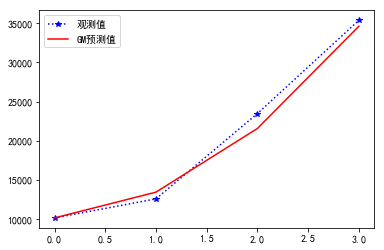

In [126]:
x = np.array([10155,12588,23480,35388])
model = GM()
model.fit(x,1)
print(model.predict())
print(model.coef)
model.plot()

[21.2        22.54276665 24.28586453 26.16374579 28.18683241 30.36635228
 32.71440144 35.24401125 37.96922072 40.90515441 44.06810637 47.47563056
 51.1466383  55.10150321 59.36217426 63.95229763 68.8973479  74.22476945
 79.96412878 86.14727859]
[-0.07448023 20.13471058]


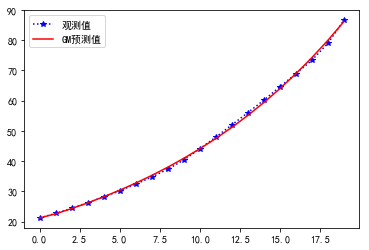

In [124]:
x = np.array([21.2,22.7,24.36,26.22,28.18,30.16,32.34,34.72,37.3,40.34,44.08,47.92,51.96,56.02,60.14,64.58,68.92,73.36,78.98,86.6])
model = GM()
model.fit(x)
print(model.predict())
print(model.coef)
model.plot()